# TP5 - Support Vector Machine : Reconnaitre des nombres

On cherche à reproduire une partie du papier qui présente les [SVM](https://dl.acm.org/doi/pdf/10.1145/130385.130401). Nous allons cependant le faire avec les données MNIST qui consiste en image de chiffre manuscrit.

Commençons par importer les données : elles sont au format d'image de taille 28x28, nous allons les transformer en un vecteur de $28\times28=784$ dimensions.

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras

(X_train, class_train), (X_test, class_test) = keras.datasets.mnist.load_data()
X_train = pd.DataFrame(X_train.reshape((X_train.shape[0], -1)), columns=["Pix. %d" % number for number in range(1, 785)])
X_test = pd.DataFrame(X_test.reshape((X_test.shape[0], -1)), columns=["Pix. %d" % number for number in range(1, 785)])
X_train.head()

2024-12-10 17:20:15.854416: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-10 17:20:15.855164: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-10 17:20:15.857262: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-10 17:20:15.863606: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733847615.874610  186166 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733847615.87

,Pix. 1,Pix. 2,Pix. 3,Pix. 4,Pix. 5,Pix. 6,Pix. 7,Pix. 8,Pix. 9,Pix. 10,...,Pix. 775,Pix. 776,Pix. 777,Pix. 778,Pix. 779,Pix. 780,Pix. 781,Pix. 782,Pix. 783,Pix. 784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Consigne** : Créer une fonction `vector_to_image` qui prend en paramètre un vecteur *vector* de taille 784 et qui renvoie une matrice de taille $28\times28$.

In [2]:
def vector_to_image(vector):
    return vector.values.reshape((28, 28))

**Consigne** : Exploiter la fonction précédente et la fonction [`imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) pour visualiser l'image associé à la première ligne de *X_train*.

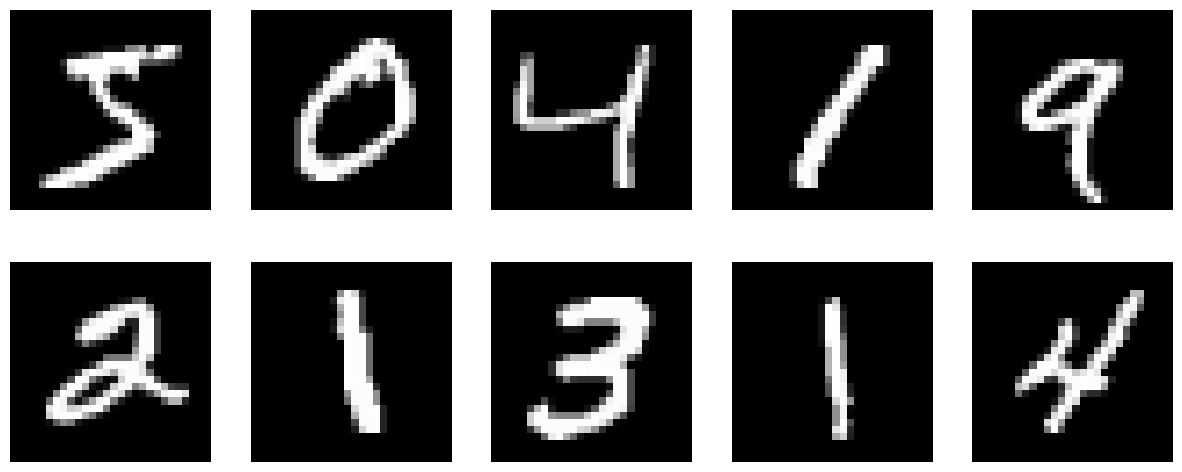

In [3]:
import matplotlib.pyplot as plt

images = X_train.head(10).apply(vector_to_image, axis=1)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap="gray")
    ax.axis("off")

**Consigne** : En exploitant la fonction [`randint`](https://docs.python.org/3/library/random.html), sélectionner aléatoirement 8 images que l'on affichera ensemble.

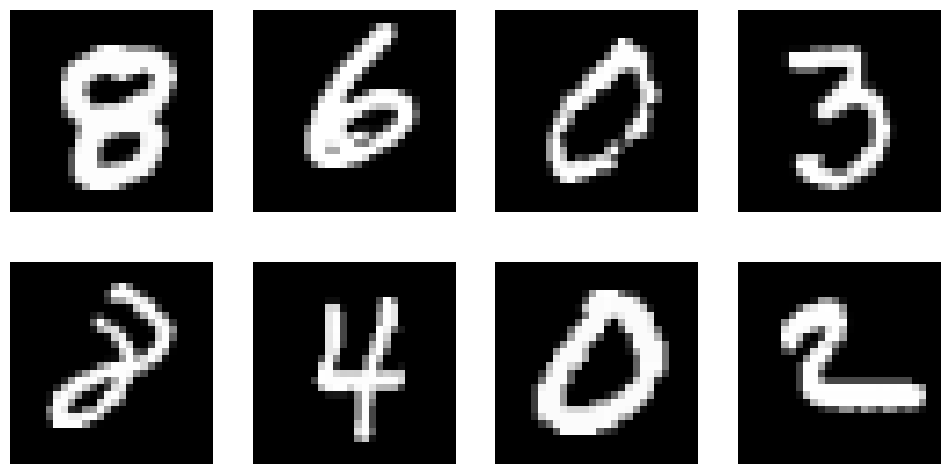

In [5]:
import random

# Select 8 random indices
random_indices = random.sample(range(len(X_train)), 8)

# Get the images corresponding to the random indices
random_images = X_train.iloc[random_indices].apply(vector_to_image, axis=1)

# Plot the random images
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(random_images.iloc[i], cmap="gray")
    ax.axis("off")

**Consigne** : Quelle est la valeur maximale du dataset ? Minimale ?

In [9]:
max_value = X_train.max().max()
min_value = X_train.min().min()

print(f"Maximum value in the dataset: {max_value}")
print(f"Minimum value in the dataset: {min_value}")

Maximum value in the dataset: 255
Minimum value in the dataset: 0


Jusqu'ici, nous n'avons travaillé qu'avec des classifications binaire. Ici, il y a 10 classes. A-t-on une bonne représentativité des classes ?

In [6]:
class_counts = pd.Series(class_train).value_counts()
print(class_counts)

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64


**Consigne** : En utilisant la classe [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), standardiser le jeu d'entraînement et le jeu de test.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back to DataFrame for consistency
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled.head()

,Pix. 1,Pix. 2,Pix. 3,Pix. 4,Pix. 5,Pix. 6,Pix. 7,Pix. 8,Pix. 9,Pix. 10,...,Pix. 775,Pix. 776,Pix. 777,Pix. 778,Pix. 779,Pix. 780,Pix. 781,Pix. 782,Pix. 783,Pix. 784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0


## Prédiction de la classe 0

Nous allons prédire la classe 0 uniquement pour commencer.

**Consigne** : Construire les vecteurs *y_train* et *y_test* pour répondre à ce besoin.

In [8]:
y_train = pd.get_dummies(class_train)
y_test = pd.get_dummies(class_test)

**Consigne** : Entraîner un modèle [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), puis mesurer ses performances à l'aide du f1-score.

**Consigne** : Comparer les performances avec un [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) sans chercher les meilleurs paramètres.

Chaque modèle SVM repose sur des vecteurs supports. L'attribut *support_* d'un modèle SVM, indique les index de ces vecteurs.

**Consigne** : Après avoir afficher le nombre de vecteurs supports nécessaire pour former le modèle, sélectionner aléatoirement 8 vecteurs support que l'on affichera ensemble.

On souhaite tester toutes les fonctionnalités du SVM : différents noyaux et différentes pénalisations.

**Consigne** : En utilisant la classe [`GridSearch`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) tester quelques noyaux et pénalisations et trouver le meilleur paramétrage.

## Prédiction d'un nombre

Nous avons montré comment apprendre la classe 0, on souhaite le faire pour toute.

**Consigne** : Créer une fonction `learn_class` qui prendra en paramètre un nombre *class_value* qui correspond à la classe que l'on cherche à prédire. Cette fonction renverra un modèle SVM entraîné pour reconnaître la classe *class_value*. On affichera également la performance du modèle sur le jeu de test.

**Consigne** : A l'aide de la fonction précédente, entraîner des SVM pour prédire chaque chiffre, tous les stocker dans la liste *models*

In [ ]:
models = []
...

On souhaite à présent exploiter ces dix modèles pour prédire le chiffre dans une image.

**Consigne** : Définir une fonction `make_prediction` qui prendra en paramètre *vector* qui correspond à une image. Elle testera la prédiction pour chaque modèle et renverra la classe prédite.

**Consigne** : Tester cette fonction sur plusieurs exemples.